## Titanic Survival Prediction (Kaggle)

This notebook explores the Titanic dataset to understand basic features and build a survival prediction model.  
The initial setup follows Alexis Cook’s Kaggle tutorial and is later extended with independent analysis.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
# Random Forest Implementation From Tutorial

# from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

print("0.77 Score")

0.77 Score


## Independent Analysis Starts Here

From this point onward, the analysis is independent of the tutorial.  
Missing values were handled by dropping `Cabin`, filling `Embarked` with the most frequent value, and imputing `Age` using simple family-based heuristics.

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
len(train_data)

891

In [9]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
# Since Embarked had 2 missing values so filling it with the highest category
train_data['Embarked'].fillna('S', inplace=True)

C:\Users\haris\AppData\Local\Temp\ipykernel_24208\3181084712.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  train_data['Embarked'].fillna('S', inplace=True)


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: str

In [11]:
train_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: str

In [12]:
# dropping Cabin because of so many missing values
train_data.drop('Cabin', axis=1, inplace=True)

In [13]:
train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# Select rows where Age is null
missing_age = train_data[train_data['Age'].isnull()][['SibSp', 'Parch', 'Pclass']]

# Display the data
missing_age

,SibSp,Parch,Pclass
5,0,0,3
17,0,0,2
19,0,0,3
26,0,0,3
28,0,0,3
29,0,0,3
31,1,0,1
32,0,0,3
36,0,0,3
42,0,0,3


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

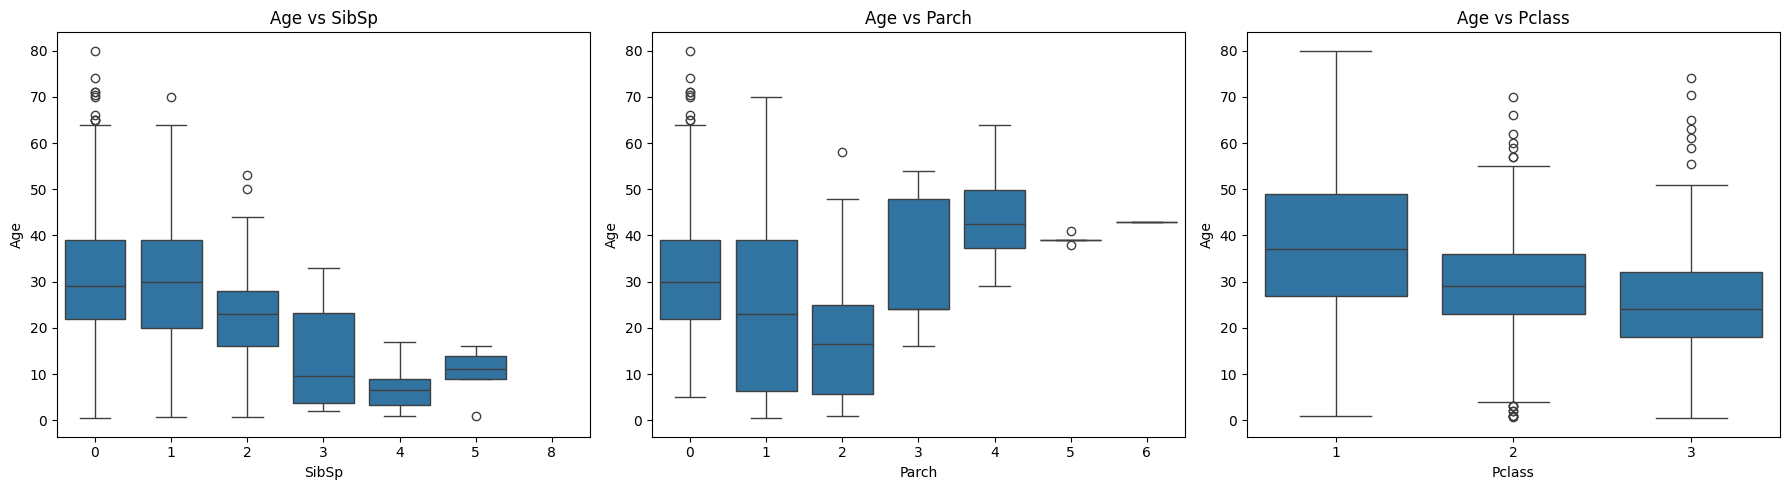

In [17]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Age vs SibSp
sns.boxplot(x='SibSp', y='Age', data=train_data, ax=axes[0])
axes[0].set_title('Age vs SibSp')

# Age vs Parch
sns.boxplot(x='Parch', y='Age', data=train_data, ax=axes[1])
axes[1].set_title('Age vs Parch')

# Age vs Pclass
sns.boxplot(x='Pclass', y='Age', data=train_data, ax=axes[2])
axes[2].set_title('Age vs Pclass')

plt.tight_layout()  # Adjust spacing
plt.show()

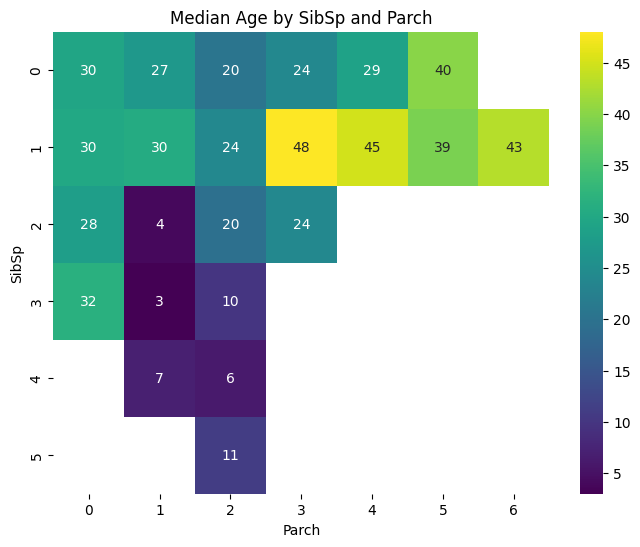

In [18]:
pivot = train_data.pivot_table(
    values='Age',
    index='SibSp',
    columns='Parch',
    aggfunc='median'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.xlabel('Parch')
plt.ylabel('SibSp')
plt.title('Median Age by SibSp and Parch')
plt.show()

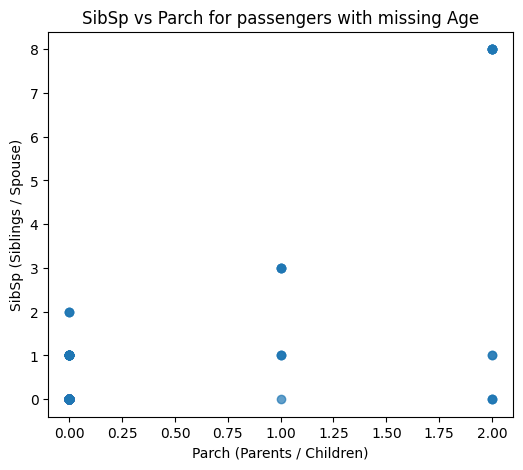

In [19]:
age_null = train_data[train_data['Age'].isnull()]
plt.figure(figsize=(6, 5))
plt.scatter(age_null['Parch'], age_null['SibSp'], alpha=0.7)

plt.xlabel('Parch (Parents / Children)')
plt.ylabel('SibSp (Siblings / Spouse)')
plt.title('SibSp vs Parch for passengers with missing Age')

plt.show()

In [20]:
age_null[['SibSp', 'Parch']].value_counts()

SibSp  Parch
0      0        133
1      0         21
8      2          7
3      1          4
2      0          3
1      1          3
0      2          3
1      2          2
0      1          1
Name: count, dtype: int64

In [21]:
exact_median = train_data.groupby(['SibSp', 'Parch'])['Age'].median()
exact_median

SibSp  Parch
0      0        29.5
       1        27.0
       2        20.5
       3        24.0
       4        29.0
       5        40.0
1      0        30.0
       1        30.5
       2        24.0
       3        48.0
       4        45.0
       5        39.0
       6        43.0
2      0        28.0
       1         4.0
       2        19.5
       3        24.0
3      0        31.5
       1         3.0
       2        10.0
4      1         7.0
       2         6.0
5      2        11.0
8      2         NaN
Name: Age, dtype: float64

### Filling Missing Age Values (Simple Heuristic)

Age was imputed using simple, rule-based assumptions:
- **Case 1:** Passengers with higher `Parch` and `SibSp` were treated as children.
- **Case 2:** Passengers with higher `Parch` but low `SibSp` were treated as adults.
- **Case 3:** All remaining missing values were filled using the global median age.
  

In [22]:
large_family_median = train_data[
    (train_data['SibSp'] + train_data['Parch']) >= 4
]['Age'].median()
large_family_median

np.float64(11.0)

In [23]:
parent_heavy_median = train_data[
    (train_data['Parch'] >= 2) & (train_data['SibSp'] < 3)
]['Age'].median()
parent_heavy_median

np.float64(24.0)

In [24]:
global_median = train_data['Age'].median()
global_median

np.float64(28.0)

In [25]:
def impute_age(row):
    if pd.notnull(row['Age']):
        return row['Age']
    
    key = (row['SibSp'], row['Parch'])
    
    # Level 1: exact group
    if key in exact_median.index and pd.notnull(exact_median.loc[key]):
        return exact_median.loc[key]
    
    # Level 2: large family fallback
    if (row['SibSp'] + row['Parch']) >= 4:
        return large_family_median
    
    # Level 3: parent-heavy fallback
    if row['Parch'] >= 2 and row['SibSp'] < 3:
        return parent_heavy_median
    
    # Level 4: global fallback
    return global_median


In [26]:
train_data['Age'] = train_data.apply(impute_age, axis=1)
test_data['Age'] = test_data.apply(impute_age, axis=1)

In [27]:
train_data['Age'].isnull().sum(), test_data['Age'].isnull().sum()

(np.int64(0), np.int64(0))

In [28]:
train_data['Age'].describe()

count    891.000000
mean      29.359899
std       13.239240
min        0.420000
25%       22.000000
50%       29.500000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

## Evaluating Scores

After imputing Age, model performance was evaluated using K-Fold cross-validation.  
Training and validation scores were compared to ensure the model was not overfitting.

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [30]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

In [31]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
scores = []
train_scores = []
cms = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=1
    )
    
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    train_pred = model.predict(X_train)
    
    score = accuracy_score(y_val, val_pred)
    train_score = accuracy_score(y_train, train_pred)
    train_scores.append(train_score)
    scores.append(score)

    cm = confusion_matrix(y_val, val_pred)
    cms.append(cm)


In [33]:
print("Fold scores:", scores)
print("Mean CV accuracy:", sum(scores) / len(scores))

variance = np.var(scores)
std_dev = np.std(scores)

print("Variance:", variance)
print("Standard Deviation:", std_dev)

print('Train Data ==================')

print("Fold scores:", train_scores)
print("Mean CV accuracy:", sum(train_scores) / len(train_scores))

variance = np.var(train_scores)
std_dev = np.std(train_scores)

print("Variance:", variance)
print("Standard Deviation:", std_dev)

print("Difference:", (sum(train_scores) / len(train_scores) - sum(scores) / len(scores)))

Fold scores: [0.7988826815642458, 0.7808988764044944, 0.7696629213483146, 0.797752808988764, 0.8258426966292135]
Mean CV accuracy: 0.7946079969870065
Variance: 0.0003627932036532178
Standard Deviation: 0.0190471311134569
Train Data ==================
Fold scores: [0.8202247191011236, 0.820476858345021, 0.8218793828892006, 0.8162692847124825, 0.8078541374474053]
Mean CV accuracy: 0.8173408764990466
Variance: 2.597909946725435e-05
Standard Deviation: 0.005096969635700643
Difference: 0.02273287951204017


### Testing a Different Model (XGBoost)

XGBoost was tested as an alternative model, but performance was similar to the Random Forest baseline, so no further tuning was pursued.

In [34]:
# from xgboost import XGBClassifier

In [35]:
# scores = []

# for train_index, val_index in skf.split(X, y):
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
#     model = XGBClassifier(
#         n_estimators=200,
#         max_depth=4,
#         learning_rate=0.05,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         random_state=42,
#         eval_metric="logloss",
#         use_label_encoder=False
#     )
    
#     model.fit(X_train, y_train)
#     val_pred = model.predict(X_val)
    
#     score = accuracy_score(y_val, val_pred)
#     scores.append(score)


In [36]:
# print("Fold scores:", scores)
# print("Mean CV accuracy:", sum(scores) / len(scores))

## In-Depth Analysis

At this stage, deeper analysis was performed to understand model behaviour and identify remaining limitations.

In [37]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.50,0,0,244373,13.0000,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,S
36,37,1,3,"Mamee, Mr. Hanna",male,29.50,0,0,2677,7.2292,C
55,56,1,1,"Woolner, Mr. Hugh",male,29.50,0,0,19947,35.5000,S
65,66,1,3,"Moubarek, Master. Gerios",male,30.50,1,1,2661,15.2458,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,C


In [38]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male")].groupby("Pclass").size()

Pclass
1    45
2    17
3    47
dtype: int64

In [39]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male")].groupby("Embarked").size()

Embarked
C    29
Q     3
S    77
dtype: int64

In [40]:
train_data.groupby("Embarked").size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [41]:
survived_pct = (
    train_data[train_data["Survived"] == 1]
    .groupby("Sex")
    .size()
    / train_data.groupby("Sex").size()
) * 100

survived_pct

Sex
female    74.203822
male      18.890815
dtype: float64

In [42]:
survived_pct = (
    train_data[train_data["Survived"] == 1]
    .groupby("Pclass")
    .size()
    / train_data.groupby("Pclass").size()
) * 100

survived_pct

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

In [43]:
survived_pct = (
    train_data[train_data["Survived"] == 1]
    .groupby("Embarked")
    .size()
    / train_data.groupby("Embarked").size()
) * 100

survived_pct

Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64

In [44]:
train_data.groupby(["Pclass", "Embarked"]).agg(
    total=("Survived", "count"),
    survived=("Survived", "sum"),
    survival_rate=("Survived", "mean")
)


total  survived  survival_rate
Pclass Embarked                                
1      C            85        59       0.694118
       Q             2         1       0.500000
       S           127        74       0.582677
2      C            17         9       0.529412
       Q             3         2       0.666667
       S           164        76       0.463415
3      C            66        25       0.378788
       Q            72        27       0.375000
       S           353        67       0.189802

In [45]:
age_bins = pd.cut(
    train_data["Age"],
    bins=range(0, 85, 5),   # 0–5, 5–10, ..., 80–85
    right=False
)


In [46]:
age_table = (
    train_data
    .groupby(age_bins)
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

age_table["survival_rate"] *= 100
age_table


,total,survived,survival_rate
Age,,,
"[0, 5)",44,27,61.363636
"[5, 10)",22,11,50.000000
"[10, 15)",23,7,30.434783
"[15, 20)",86,34,39.534884
"[20, 25)",119,40,33.613445
"[25, 30)",243,74,30.452675
"[30, 35)",119,55,46.218487
"[35, 40)",72,33,45.833333
"[40, 45)",48,18,37.500000


In [47]:
cm_df = pd.DataFrame(
    cms[0],
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

cm_df

,Pred 0,Pred 1
Actual 0,96,14
Actual 1,22,47


In [48]:
TN, FP, FN, TP = cms[0].ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision, recall

(np.float64(0.7704918032786885), np.float64(0.6811594202898551))

In [49]:
sex_summary = (
    train_data
    .groupby("Sex")
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        not_survived=("Survived", lambda x: (x == 0).sum()),
        survival_pct=("Survived", "mean")
    )
)

sex_summary["survival_pct"] *= 100
sex_summary


,total,survived,not_survived,survival_pct
Sex,,,,
female,314,233,81,74.203822
male,577,109,468,18.890815


In [50]:
pclass_summary = (
    train_data
    .groupby("Pclass")
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        not_survived=("Survived", lambda x: (x == 0).sum()),
        survival_pct=("Survived", "mean")
    )
)

pclass_summary["survival_pct"] *= 100
pclass_summary

,total,survived,not_survived,survival_pct
Pclass,,,,
1,216,136,80,62.962963
2,184,87,97,47.282609
3,491,119,372,24.236253


In [51]:
embarked_summary = (
    train_data
    .dropna(subset=["Embarked"])
    .groupby("Embarked")
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        not_survived=("Survived", lambda x: (x == 0).sum()),
        survival_pct=("Survived", "mean")
    )
)

embarked_summary["survival_pct"] *= 100
embarked_summary


,total,survived,not_survived,survival_pct
Embarked,,,,
C,168,93,75,55.357143
Q,77,30,47,38.961039
S,644,217,427,33.695652


In [52]:
age_class_table = (
    train_data
    .groupby([age_bins, "Pclass"])
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

age_class_table["survival_rate"] *= 100
age_class_table


total  survived  survival_rate
Age      Pclass                                
[0, 5)   1           3         2      66.666667
         2          12        12     100.000000
         3          29        13      44.827586
[5, 10)  2           5         5     100.000000
         3          17         6      35.294118
[10, 15) 1           2         2     100.000000
         2           2         2     100.000000
         3          19         3      15.789474
[15, 20) 1          16        13      81.250000
         2          16         7      43.750000
         3          54        14      25.925926
[20, 25) 1          18        14      77.777778
         2          23        10      43.478261
         3          78        16      20.512821
[25, 30) 1          40        18      45.000000
         2          41        16      39.024390
         3         162        40      24.691358
[30, 35) 1          24        20      83.333333
         2          32        15      46.875000
         3          63        20      31.746032
[35, 40) 1          32        25      78.125000
         2          16         4      25.000000
         3          24         4      16.666667
[40, 45) 1          14        10      71.428571
         2          12         7      58.333333
         3          22         1       4.545455
[45, 50) 1          23        12      52.173913
         2           6         3      50.000000
         3          12         1       8.333333
[50, 55) 1          17        10      58.823529
         2          11         4      36.363636
         3           4         0       0.000000
[55, 60) 1          10         5      50.000000
         2           4         1      25.000000
         3           2         0       0.000000
[60, 65) 1          11         4      36.363636
         2           2         1      50.000000
         3           2         1      50.000000
[65, 70) 1           2         0       0.000000
         2           1         0       0.000000
         3           1         0       0.000000
[70, 75) 1           3         0       0.000000
         2           1         0       0.000000
         3           2         0       0.000000

In [53]:
age_sex_class_table = (
    train_data
    .groupby([age_bins, "Sex", "Pclass"])
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

age_sex_class_table["survival_rate"] *= 100
age_sex_class_table

total  survived  survival_rate
Age      Sex    Pclass                                
[0, 5)   female 1           1         0       0.000000
                2           4         4     100.000000
                3          15         8      53.333333
         male   1           2         2     100.000000
                2           8         8     100.000000
                3          14         5      35.714286
[5, 10)  female 2           4         4     100.000000
                3           9         3      33.333333
         male   2           1         1     100.000000
                3           8         3      37.500000
[10, 15) female 1           1         1     100.000000
                2           2         2     100.000000
                3           9         2      22.222222
         male   1           1         1     100.000000
                3          10         1      10.000000
[15, 20) female 1          12        12     100.000000
                2           6         6     100.000000
                3          18        11      61.111111
         male   1           4         1      25.000000
                2          10         1      10.000000
                3          36         3       8.333333
[20, 25) female 1          13        13     100.000000
                2          11        10      90.909091
                3          22        10      45.454545
         male   1           5         1      20.000000
                2          12         0       0.000000
                3          56         6      10.714286
[25, 30) female 1           6         5      83.333333
                2          16        14      87.500000
                3          36        23      63.888889
         male   1          34        13      38.235294
                2          25         2       8.000000
                3         126        17      13.492063
[30, 35) female 1          17        17     100.000000
                2          12        12     100.000000
                3          19        11      57.894737
         male   1           7         3      42.857143
                2          20         3      15.000000
                3          44         9      20.454545
[35, 40) female 1          16        16     100.000000
                2           5         4      80.000000
                3           6         3      50.000000
         male   1          16         9      56.250000
                2          11         0       0.000000
                3          18         1       5.555556
[40, 45) female 1           7         7     100.000000
                2           7         6      85.714286
                3           4         0       0.000000
         male   1           7         3      42.857143
                2           5         1      20.000000
                3          18         1       5.555556
[45, 50) female 1           6         6     100.000000
                2           3         3     100.000000
                3           5         0       0.000000
         male   1          17         6      35.294118
                2           3         0       0.000000
                3           7         1      14.285714
[50, 55) female 1           8         7      87.500000
                2           4         4     100.000000
         male   1           9         3      33.333333
                2           7         0       0.000000
                3           4         0       0.000000
[55, 60) female 1           4         4     100.000000
                2           2         1      50.000000
         male   1           6         1      16.666667
                2           2         0       0.000000
                3           2         0       0.000000
[60, 65) female 1           3         3     100.000000
                3           1         1     100.000000
         male   1           8         1      12.500000
                2           2         1      50.000000
         

In [54]:
male_pclass3_age_table = (
    train_data[
        (train_data["Sex"] == "male") &
        (train_data["Pclass"] == 3) &
        (train_data["Embarked"] == "Q")
    ]
    .groupby(age_bins)
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

male_pclass3_age_table["survival_rate"] *= 100
male_pclass3_age_table


,total,survived,survival_rate
Age,,,
"[0, 5)",2,0,0.000000
"[5, 10)",2,0,0.000000
"[15, 20)",1,0,0.000000
"[20, 25)",1,0,0.000000
"[25, 30)",23,3,13.043478
"[30, 35)",6,0,0.000000
"[40, 45)",2,0,0.000000
"[65, 70)",1,0,0.000000
"[70, 75)",1,0,0.000000


In [55]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male") & (train_data["Pclass"] == 3) &
        (train_data["Embarked"] == "Q")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,28.0,2,0,367226,23.25,Q
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.75,Q
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,29.5,0,0,367228,7.75,Q


In [56]:
train_data[(train_data["Survived"] == 1) & (train_data["Pclass"] == 3) &
        (train_data["Embarked"] == "Q")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.5,0,0,330959,7.8792,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,29.5,0,0,335677,7.7500,Q
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,29.5,0,0,14311,7.7500,Q
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,29.5,0,0,330932,7.7875,Q
109,110,1,3,"Moran, Miss. Bertha",female,30.0,1,0,371110,24.1500,Q
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,Q
186,187,1,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,30.0,1,0,370365,15.5000,Q
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,29.5,0,0,370370,7.7500,Q


In [60]:
train_data["Ticket_num"] = pd.to_numeric(
    train_data["Ticket"],
    errors="coerce"
)

filtered = train_data[
    (train_data["Survived"] == 1) &
    (train_data["Ticket_num"].between(300000, 400000))
]


In [61]:
filtered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_num
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,347742.0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q,330923.0
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S,347077.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,29.5,0,0,330959,7.8792,Q,330959.0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,29.5,0,0,335677,7.7500,Q,335677.0
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,Q,330958.0
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,S,364516.0
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,S,345779.0
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,29.5,0,0,330932,7.7875,Q,330932.0
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,S,343120.0


In [62]:
survival_percentage = filtered["Survived"].mean() * 100
survival_percentage

np.float64(100.0)

In [63]:
len(filtered)

54

In [64]:
records = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=1
    )

    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)

    for idx, actual, pred in zip(val_index, y_val, val_pred):
        records.append({
            "index": idx,
            "actual": actual,
            "predicted": pred
        })

    break


In [78]:
# Since we are focusing on False negative
endResults = pd.DataFrame(records)
FNs = endResults.loc[
    (endResults['actual'] == 1) & (endResults['predicted'] == 0),
    'index'
]
FNs

13      55
18      68
36     146
49     207
56     283
58     286
75     348
89     407
94     429
99     449
108    507
113    549
114    550
117    587
119    607
130    647
139    707
143    724
147    737
154    788
161    803
167    839
Name: index, dtype: int64

In [81]:
fold_data_FNs = train_data.loc[FNs]
fold_data_FNs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_num
55,56,1,1,"Woolner, Mr. Hugh",male,29.50,0,0,19947,35.5000,S,19947.0
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,S,3101281.0
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.00,0,0,350043,7.7958,S,350043.0
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.00,0,0,2699,18.7875,C,2699.0
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.00,0,0,A/5. 10482,8.0500,S,NaN
286,287,1,3,"de Mulder, Mr. Theodore",male,30.00,0,0,345774,9.5000,S,345774.0
348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,S,NaN
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.7500,S,29106.0
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.00,0,0,SOTON/O.Q. 392078,8.0500,S,NaN
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.00,0,0,113786,30.5000,S,113786.0


In [82]:
fold_data_FNs.groupby('Pclass').size()

Pclass
1    11
2     2
3     9
dtype: int64

In [83]:
fold_data_FNs.groupby('Embarked').size()

Embarked
C     7
S    15
dtype: int64

In [86]:
# Since we are focusing on False negative
endResults = pd.DataFrame(records)
TNs = endResults.loc[
    (endResults['actual'] == 0) & (endResults['predicted'] == 0),
    'index'
]

In [87]:
fold_data_TNs = train_data.loc[TNs]
fold_data_TNs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_num
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,373450.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,17463.0
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,347082.0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S,349909.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,29.5,0,0,2631,7.2250,C,2631.0
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,NaN
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C,NaN
45,46,0,3,"Rogers, Mr. William John",male,29.5,0,0,S.C./A.4. 23567,8.0500,S,NaN
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C,2669.0
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S,347088.0


In [90]:
pClass = fold_data_TNs[fold_data_TNs['Sex'] == 'male'].groupby('Pclass').size()

print("True Negatives")
print(pClass)

print("\n")

pClass = fold_data_FNs[fold_data_FNs['Sex'] == 'male'].groupby('Pclass').size()

print("False Negatives")
print(pClass)


True Negatives
Pclass
1    16
2    17
3    58
dtype: int64


False Negatives
Pclass
1    11
2     2
3     8
dtype: int64


In [102]:
tn_male_p1 = fold_data_TNs[
    (fold_data_TNs['Sex'] == 'male') &
    (fold_data_TNs['Pclass'] == 1)
].copy()

fn_male_p1 = fold_data_FNs[
    (fold_data_FNs['Sex'] == 'male') &
    (fold_data_FNs['Pclass'] == 1)
].copy()

tn_male_p1['case'] = 'TN'
fn_male_p1['case'] = 'FN'

combined = pd.concat([tn_male_p1, fn_male_p1], axis=0)
combined


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ticket_num,case
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,17463.0,TN
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,NaN,TN
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C,NaN,TN
64,65,0,1,"Stewart, Mr. Albert A",male,29.5,0,0,PC 17605,27.7208,C,NaN,TN
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,C,NaN,TN
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,C,NaN,TN
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S,111240.0,TN
174,175,0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,C,17764.0,TN
273,274,0,1,"Natsch, Mr. Charles H",male,37.0,0,1,PC 17596,29.7000,C,NaN,TN
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,S,113043.0,TN


In [104]:
age_bins = np.arange(0, tn_male_p1['Age'].max() + 5, 5)
tn_age_embarked = (
    tn_male_p1
    .groupby([
        pd.cut(tn_male_p1['Age'], bins=age_bins),
        tn_male_p1['Embarked']
    ])
    .size()
)

print("True Negatives (Age x Embarked)")
print(tn_age_embarked)

print("---------------------------------")

age_bins = np.arange(0, fn_male_p1['Age'].max() + 5, 5)
fn_age_embarked = (
    fn_male_p1
    .groupby([
        pd.cut(fn_male_p1['Age'], bins=age_bins),
        fn_male_p1['Embarked']
    ])
    .size()
)

print("\nFalse Negatives (Age x Embarked)")
print(fn_age_embarked)

True Negatives (Age x Embarked)
Age           Embarked
(20.0, 25.0]  C           1
(25.0, 30.0]  C           3
              S           2
(35.0, 40.0]  C           2
              S           1
(45.0, 50.0]  S           1
(50.0, 55.0]  C           1
              S           1
(55.0, 60.0]  C           1
(60.0, 65.0]  S           2
(70.0, 75.0]  C           1
dtype: int64
---------------------------------

False Negatives (Age x Embarked)
Age           Embarked
(15.0, 20.0]  C           1
(25.0, 30.0]  C           1
              S           4
(30.0, 35.0]  C           1
(40.0, 45.0]  S           1
(50.0, 55.0]  S           1
(55.0, 60.0]  C           2
dtype: int64


# Updating Threshold

In [105]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
thresholds = [0.3, 0.4, 0.5]
records = {}

for threshold in thresholds:
    records[threshold] = {
        "recall": [],
        "precision": [],
        "confusion_matrices": []
    }
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=5,
            random_state=1
        )
        
        model.fit(X_train, y_train)
    
        # Get probability of Survived (class = 1)
        val_probs = model.predict_proba(X_val)[:, 1]
    
        # Apply threshold
        val_pred = (val_probs >= threshold).astype(int)

        # Confusion matrix
        cm = confusion_matrix(y_val, val_pred)
        records[threshold]["confusion_matrices"].append(cm)
    
        # Extract values
        TN, FP, FN, TP = cm.ravel()

        # Metrics
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        records[threshold]["recall"].append(recall)
        records[threshold]["precision"].append(precision)



In [107]:
summary = []

for t, data in records.items():
    summary.append({
        "threshold": t,
        "recall_mean": np.mean(data["recall"]),
        "recall_std": np.std(data["recall"]),
        "precision_mean": np.mean(data["precision"]),
        "precision_std": np.std(data["precision"])
    })

summary_df = pd.DataFrame(summary).set_index("threshold")
summary_df

,recall_mean,recall_std,precision_mean,precision_std
threshold,,,,
0.3,0.812788,0.030048,0.639543,0.016497
0.4,0.730733,0.043494,0.720048,0.012199
0.5,0.642967,0.062181,0.783481,0.022124


### “I chose a threshold of 0.4 because it increased recall substantially while maintaining stable and acceptable precision across folds.”